In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
file_path = 'data/F1DriversDataset.csv'
dataset = pd.read_csv(file_path)

print(dataset.head())

              Driver     Nationality                         Seasons  \
0        Carlo Abate           Italy                    [1962, 1963]   
1   George Abecassis  United Kingdom                    [1951, 1952]   
2      Kenny Acheson  United Kingdom                    [1983, 1985]   
3  Andrea de Adamich           Italy  [1968, 1970, 1971, 1972, 1973]   
4     Philippe Adams         Belgium                          [1994]   

   Championships  Race_Entries  Race_Starts  Pole_Positions  Race_Wins  \
0            0.0           3.0          0.0             0.0        0.0   
1            0.0           2.0          2.0             0.0        0.0   
2            0.0          10.0          3.0             0.0        0.0   
3            0.0          36.0         30.0             0.0        0.0   
4            0.0           2.0          2.0             0.0        0.0   

   Podiums  Fastest_Laps  ...  Championship Years  Decade Pole_Rate  \
0      0.0           0.0  ...                 NaN  

In [58]:
dataset['Has_Wins'] = dataset['Race_Wins'] > 0

print(dataset['Has_Wins'].value_counts())

target = 'Has_Wins'


Has_Wins
False    755
True     113
Name: count, dtype: int64


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

In [48]:
dataset.describe()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,0.084101,29.917051,27.694700,1.244240,1.247696,3.756912,1.261521,55.849459,1972.223502,0.011471,0.779824,0.011050,0.041389,0.011894,0.479158,3.664747
std,0.524883,53.780150,52.876476,6.347512,6.491921,14.432826,5.413644,265.968614,20.201084,0.046544,0.324303,0.043579,0.106457,0.043514,1.213826,3.501761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.962251,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,29.250000,26.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1982.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.382517,5.000000
max,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


In [49]:
dataset.dropna(inplace=True)

In [50]:
dataset.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [63]:
target = 'Race_Wins'
features = ['Race_Entries', 'Race_Starts', 'Pole_Positions', 'Podiums', 'Fastest_Laps', 'Points_Per_Entry', 'Years_Active']

X = dataset[features]
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
models = {
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f'{model_name} trained.')

KNN trained.
Decision Tree trained.
Random Forest trained.
Linear Regression trained.


Performance of KNN:
Mean Squared Error: 1.568045977011494
R^2 Score: 0.9230685613444888
------------------------------------------------------------


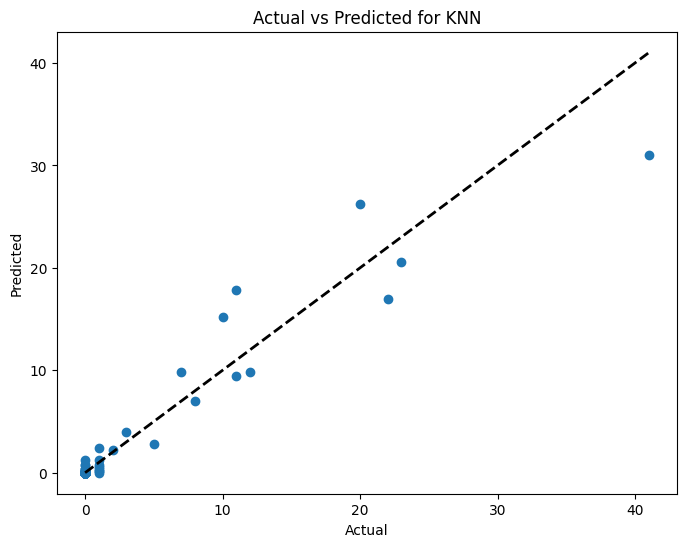

Performance of Decision Tree:
Mean Squared Error: 9.488505747126437
R^2 Score: 0.5344751311382165
------------------------------------------------------------


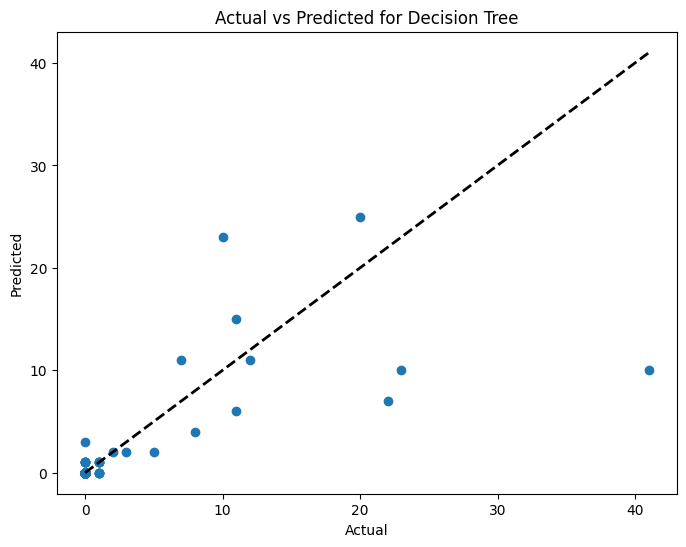

Performance of Random Forest:
Mean Squared Error: 2.2517333333333336
R^2 Score: 0.8895255066869552
------------------------------------------------------------


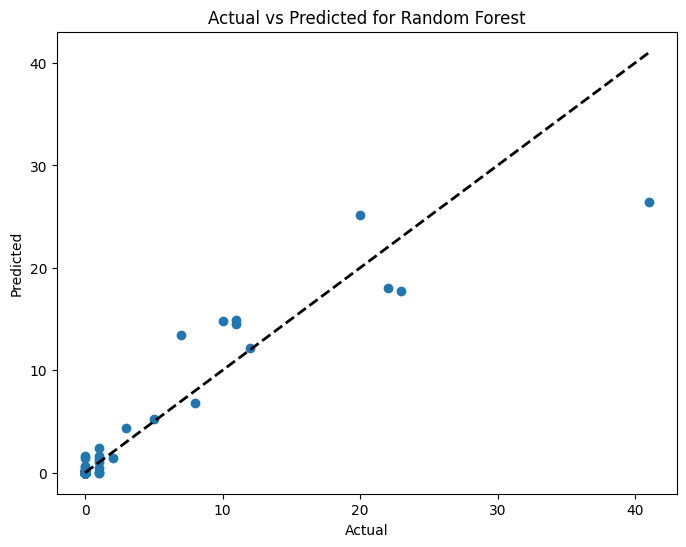

Performance of Linear Regression:
Mean Squared Error: 2.986199585134065
R^2 Score: 0.8534911389303158
------------------------------------------------------------


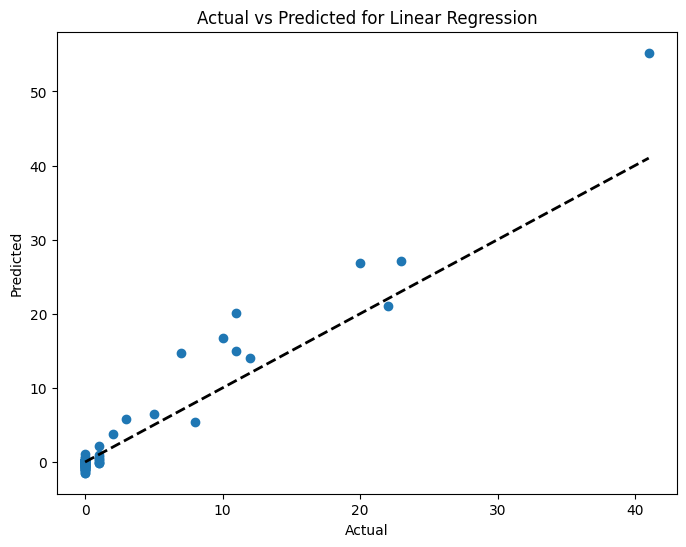

In [65]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Performance of {model_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('-' * 60)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

for model_name, model in models.items():
    evaluate_model(model, X_test_scaled, y_test, model_name)


Performance of KNN:
Mean Absolute Error (MAE): 0.3275862068965517
Mean Squared Error (MSE): 1.568045977011494
Root Mean Squared Error (RMSE): 1.2522164257872894
R^2 Score: 0.9230685613444888
------------------------------------------------------------


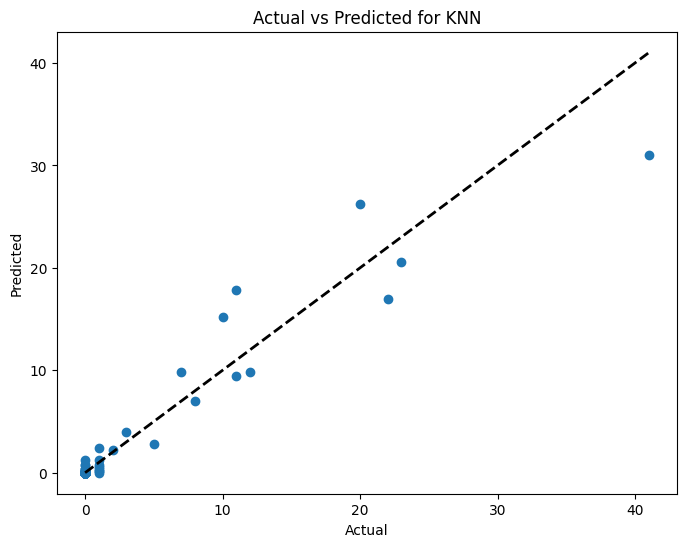

Performance of Decision Tree:
Mean Absolute Error (MAE): 0.6379310344827587
Mean Squared Error (MSE): 9.488505747126437
Root Mean Squared Error (RMSE): 3.080341823097956
R^2 Score: 0.5344751311382165
------------------------------------------------------------


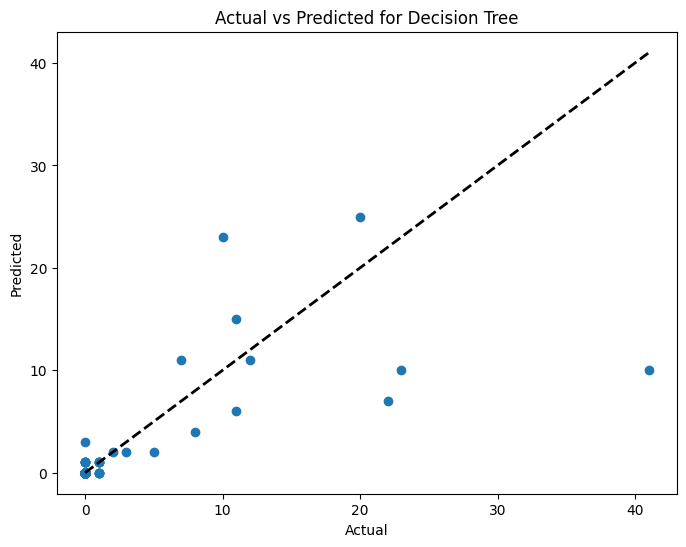

Performance of Random Forest:
Mean Absolute Error (MAE): 0.363448275862069
Mean Squared Error (MSE): 2.2517333333333336
Root Mean Squared Error (RMSE): 1.5005776665448989
R^2 Score: 0.8895255066869552
------------------------------------------------------------


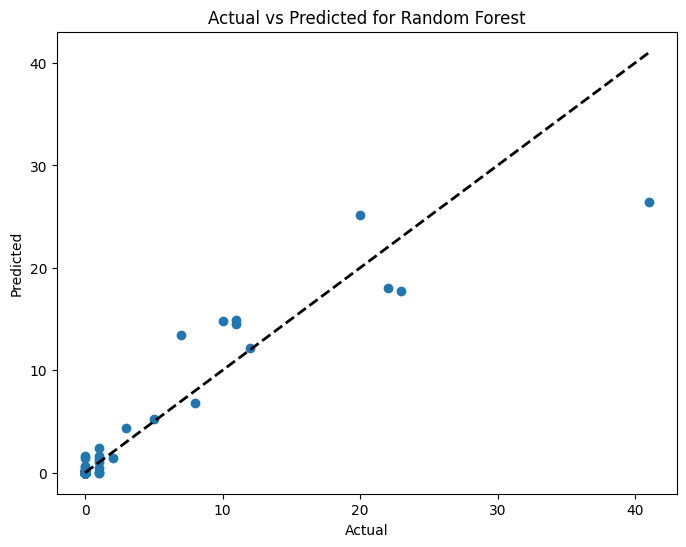

Performance of Linear Regression:
Mean Absolute Error (MAE): 0.6064181611153814
Mean Squared Error (MSE): 2.986199585134065
Root Mean Squared Error (RMSE): 1.728062378831871
R^2 Score: 0.8534911389303158
------------------------------------------------------------


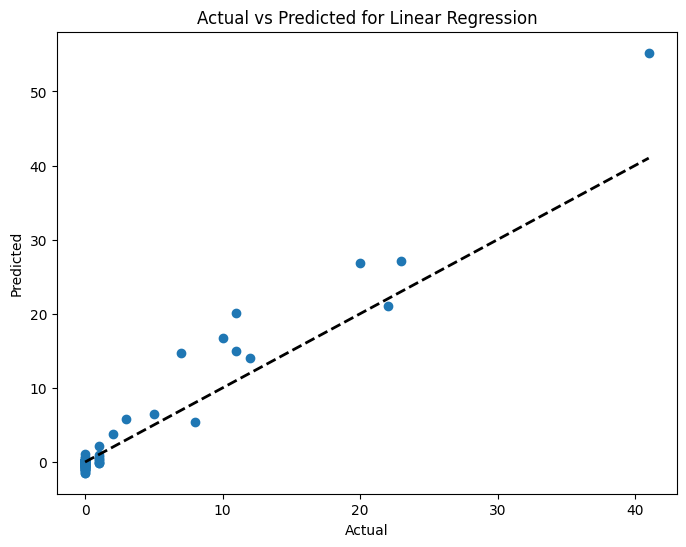

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Performance of {model_name}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R^2 Score: {r2}')
    print('-' * 60)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

for model_name, model in models.items():
    evaluate_model(model, X_test_scaled, y_test, model_name)


## Model Performance Analysis

### Introduction
This section presents a detailed analysis of the performance of four machine learning models: K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Linear Regression. These models were evaluated based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score. The results are summarized in the table below.

### Performance Summary

| Model             | MAE         | MSE         | RMSE        | R² Score    |
|-------------------|-------------|-------------|-------------|-------------|
| KNN               | 0.328       | 1.568       | 1.252       | 0.923       |
| Decision Tree     | 0.638       | 9.489       | 3.080       | 0.534       |
| Random Forest     | 0.363       | 2.252       | 1.501       | 0.890       |
| Linear Regression | 0.606       | 2.986       | 1.728       | 0.853       |

### Interpretation

#### K-Nearest Neighbors (KNN)
- **Performance**: KNN demonstrated the best performance among all models with the highest R² score of 0.923. This indicates that KNN explains 92.3% of the variance in the target variable.
- **Error Metrics**: KNN also had the lowest MAE (0.328) and RMSE (1.252), indicating it has the smallest average and root mean squared errors in its predictions.

#### Decision Tree
- **Performance**: The Decision Tree model showed the lowest performance with an R² score of 0.534. This means it explains only 53.4% of the variance in the target variable.
- **Error Metrics**: It had the highest MAE (0.638), MSE (9.489), and RMSE (3.080), indicating larger errors in its predictions compared to other models.

#### Random Forest
- **Performance**: Random Forest performed well with a high R² score of 0.890, indicating it explains 89.0% of the variance in the target variable.
- **Error Metrics**: It had a low MAE (0.363) and RMSE (1.501), making it a reliable model with relatively low prediction errors.

#### Linear Regression
- **Performance**: Linear Regression also performed decently with an R² score of 0.853, explaining 85.3% of the variance.
- **Error Metrics**: It had higher MAE (0.606) and RMSE (1.728) compared to KNN and Random Forest, but still within an acceptable range.

### Recommendations
Based on the performance metrics, we provide the following recommendations:

1. **K-Nearest Neighbors (KNN)**:
   - **Recommendation**: KNN is the most effective model for this dataset due to its superior performance across all metrics. It should be the primary model used for prediction tasks.
   - **Action**: Further fine-tuning of the KNN model parameters (e.g., the number of neighbors) could potentially enhance its performance even further.

2. **Random Forest**:
   - **Recommendation**: Random Forest is a strong alternative to KNN. Its performance is robust, making it a reliable choice.
   - **Action**: Consider using Random Forest in conjunction with KNN to validate results and ensure model robustness.

3. **Decision Tree**:
   - **Recommendation**: The Decision Tree model is not recommended due to its significantly lower performance metrics.
   - **Action**: It might be useful for understanding feature importances but should not be relied upon for accurate predictions.

4. **Linear Regression**:
   - **Recommendation**: Linear Regression is an acceptable model but not as strong as KNN or Random Forest. It can be used as a benchmark for comparing other models.
   - **Action**: Further investigation into feature engineering or polynomial regression could improve its performance.

### Conclusion
In conclusion, the KNN and Random Forest models demonstrate superior performance and are recommended for predicting the target variable in this dataset. The Decision Tree model, while useful for interpretability, does not provide the accuracy needed for reliable predictions. Linear Regression serves as a decent baseline model but does not match the performance of KNN or Random Forest.

Future work should focus on fine-tuning the KNN and Random Forest models and exploring additional features or advanced regression techniques to enhance the prediction accuracy further.
